In [1]:
import import_ipynb
import preprocess_model
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, SimpleRNN, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Reshape


importing Jupyter notebook from preprocess_model.ipynb

Shape: (1316, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            1316 non-null   float64
 1   Female Population                           1316 non-null   float64
 2   Male Population                             1316 non-null   float64
 3   Birth Rate                                  1269 non-null   float64
 4   Death Rate                                  1269 non-null   float64
 5   Compulsory Education Dur.                   1041 non-null   float64
 6   Employment in Industry(%)                   1267 non-null   float64
 7   Employment in Agriculture(%)                1267 non-null   float64
 8   Female Employment in Agriculture(%)         1267 non-null   float64
 9   Female Empl

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
df = preprocess_model.df_cnn


In [3]:
X_col = preprocess_model.X_col
Country = preprocess_model.Country
y_target = preprocess_model.y_target

# # Drop rows with missing target values
# df.dropna(subset=[target], inplace=True)



Epoch 1/20

15/15 [==============================] - 3s 40ms/step - loss: 9504.7803 - val_loss: 9456.3740
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 6632.1465 - val_loss: 4903.6562
Epoch 3/20
15/15 [==============================] - 0s 18ms/step - loss: 2465.3027 - val_loss: 142.7554
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 412.4493 - val_loss: 482.8817
Epoch 5/20
15/15 [==============================] - 0s 13ms/step - loss: 227.5210 - val_loss: 127.3220
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 104.4314 - val_loss: 81.7357
Epoch 7/20
15/15 [==============================] - 0s 13ms/step - loss: 79.5703 - val_loss: 53.6808
Epoch 8/20
15/15 [==============================] - 0s 14ms/step - loss: 56.7115 - val_loss: 46.1089
Epoch 9/20
15/15 [==============================] - 0s 14ms/step - loss: 39.0645 - val_loss: 22.5816
Epoch 10/20
15/15 [==============================] - 0s 14ms/step - loss

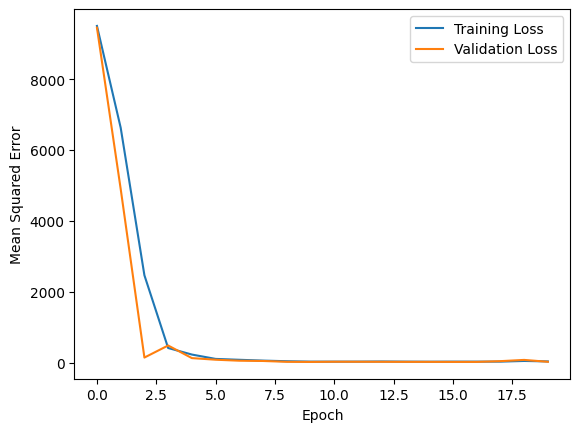

In [4]:
# Get data from preprocess_model
X_encoded = preprocess_model.X_encoded



X_scaled = preprocess_model.X_scaled


X = np.concatenate((X_encoded, X_scaled), axis=1)
y = df[y_target]

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

X_col_train, X_num_train = preprocess_model.X_col_train, preprocess_model.X_num_train
X_col_val, X_num_val = preprocess_model.X_col_val, preprocess_model.X_num_val, 
X_col_test, X_num_test = preprocess_model.X_col_test, preprocess_model.X_num_test



# Define model architecture
num_input = Input(shape=(X_num_train.shape[1], X_num_train.shape[2]))
rnn_layer = SimpleRNN(64, activation='relu')(num_input)

cat_input = Input(shape=(X_col_train.shape[1],))
cat_output = Dense(64, activation='relu')(cat_input)

concatenated = Concatenate()([rnn_layer, cat_output])
output = Dense(1)(concatenated)

model = Model(inputs=[num_input, cat_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_num_train, X_col_train], y_train, epochs=20, batch_size=64,
                    validation_data=([X_num_val, X_col_val], y_val), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_num_test, X_col_test], y_test)


# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [5]:
# Make predictions on the test set
predictions = model.predict([X_num_test, X_col_test])
print(predictions)
mse = mean_squared_error(preprocess_model.y_test, predictions)
mae = mean_absolute_error(preprocess_model.y_test, predictions)
r2 = r2_score(preprocess_model.y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

7/7 [==============================] - 0s 4ms/step
[[95.757744]
 [96.936714]
 [98.14333 ]
 [97.50907 ]
 [93.693596]
 [97.139175]
 [96.82487 ]
 [95.96581 ]
 [94.73171 ]
 [96.42925 ]
 [95.66217 ]
 [94.94532 ]
 [97.78301 ]
 [97.76866 ]
 [94.88589 ]
 [93.67829 ]
 [96.466835]
 [94.93482 ]
 [95.61108 ]
 [94.31353 ]
 [97.91291 ]
 [96.24111 ]
 [96.56074 ]
 [96.163246]
 [96.19314 ]
 [96.95017 ]
 [95.3052  ]
 [98.26446 ]
 [96.04026 ]
 [96.17637 ]
 [97.000305]
 [94.33169 ]
 [94.754974]
 [97.907845]
 [95.462105]
 [95.31043 ]
 [96.64747 ]
 [96.60507 ]
 [98.03037 ]
 [94.2972  ]
 [97.29432 ]
 [95.53246 ]
 [95.772995]
 [94.55707 ]
 [94.68409 ]
 [94.66515 ]
 [96.90126 ]
 [97.17746 ]
 [98.0322  ]
 [94.901085]
 [96.647934]
 [96.51371 ]
 [98.13979 ]
 [94.721176]
 [94.88067 ]
 [94.23353 ]
 [97.15632 ]
 [94.10273 ]
 [97.53853 ]
 [96.45544 ]
 [95.31664 ]
 [94.608894]
 [96.14808 ]
 [97.233025]
 [94.931915]
 [94.15368 ]
 [96.61953 ]
 [96.7246  ]
 [94.23603 ]
 [96.03933 ]
 [97.15588 ]
 [96.27203 ]
 [93.9307  ]


ValueError: Found input variables with inconsistent numbers of samples: [264, 198]